## Support Vector Machines (SVM)

Support Vector Machines (SVM) is a powerful and flexible class of supervised algorithms for both classification and regression. It can also be used for outliers detection. SVMs are particularly well suited for classification of complex small- or medium-sized datasets. They can be used for linear or non-linear classification, regression, or even outlier detection. SVMs are fundamentally a binary classifier. For multiclass classification, multiple binary SVM classifiers are trained in a one-vs-one or one-vs-rest manner.

The main idea behind SVM is to find the optimal hyperplane which maximizes the margin between two classes. In 2-D space, this hyperplane is a line. The vectors (cases) that define the hyperplane are the support vectors. Once the support vectors are found, data can be classified by finding on which side of the hyperplane they fall. This makes SVMs especially useful for binary classification.

## Метод опорных векторов (SVM)

Метод опорных векторов (SVM) - это мощный и гибкий класс алгоритмов обучения с учителем как для классификации, так и для регрессии. Он также может быть использован для обнаружения выбросов. SVM особенно хорошо подходят для классификации сложных небольших или средних по размеру наборов данных. Они могут быть использованы для линейной или нелинейной классификации, регрессии или даже обнаружения выбросов. SVM в основном является бинарным классификатором. Для многоклассовой классификации обучаются несколько бинарных классификаторов SVM в режиме один-против-одного или один-против-всех.

Основная идея за SVM - найти оптимальную гиперплоскость, которая максимизирует зазор между двумя классами. В 2-D пространстве эта гиперплоскость представляет собой линию. Векторы (случаи), которые определяют гиперплоскость, являются опорными векторами. Как только опорные векторы найдены, данные можно классифицировать, определив, с какой стороны гиперплоскости они находятся. Это делает SVM особенно полезными для бинарной классификации.

100%|██████████| 9912422/9912422 [00:00<00:00, 24159634.63it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 65443378.62it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32811413.94it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12582912.00it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Accuracy: 0.9358


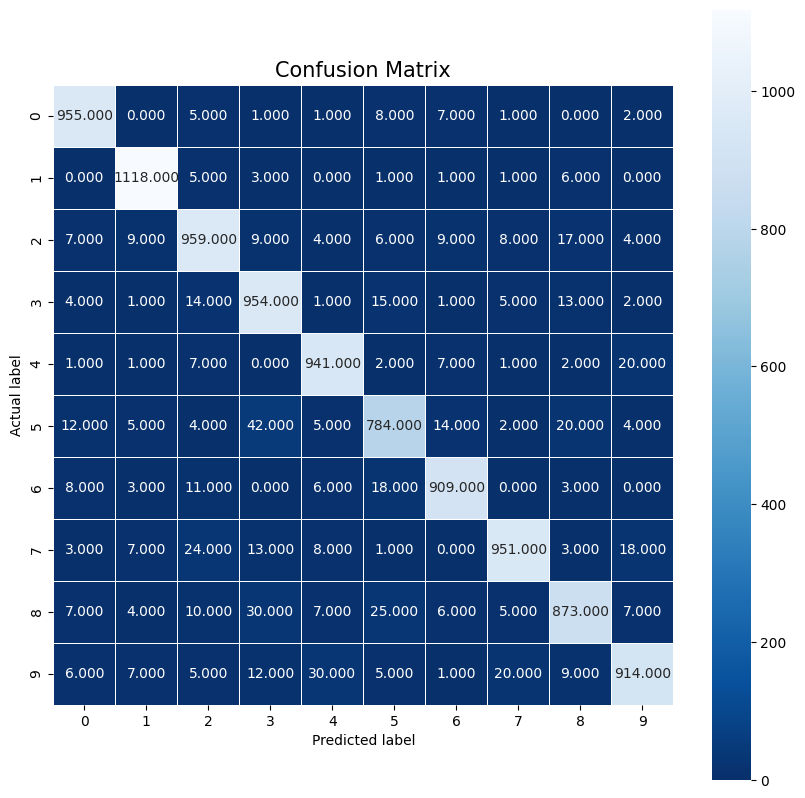

In [2]:
import torch
from torchvision import datasets, transforms
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class SVMClassifier:
    """
    A class used to represent a Support Vector Machines (SVM) Classifier.

    ...

    Attributes
    ----------
    clf : sklearn.svm.SVC
        The SVM classifier from scikit-learn.
    X_train : numpy.ndarray
        The training data.
    y_train : numpy.ndarray
        The training labels.
    X_test : numpy.ndarray
        The test data.
    y_test : numpy.ndarray
        The test labels.
    predictions : numpy.ndarray
        The predictions made by the classifier on the test data.

    Methods
    -------
    load_data():
        Loads the MNIST data.
    train():
        Trains the SVM classifier.
    predict():
        Makes predictions on the test data.
    accuracy():
        Returns the accuracy of the classifier.
    plot_confusion_matrix():
        Plots a confusion matrix of the classifier's predictions.
    """

    def __init__(self, kernel='linear'):
        """
        Constructs all the necessary attributes for the SVMClassifier object.

        Parameters
        ----------
            kernel : str
                The kernel type to be used in the SVM algorithm.
        """

        self.clf = svm.SVC(kernel=kernel)

    def load_data(self):
        """Loads the MNIST data."""

        # Define a transform to normalize the data
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5,), (0.5,))])

        # Download and load the training data
        trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
        testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

        # Use DataLoader to handle batching of the data
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True)
        testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=True)

        # Convert the data to numpy arrays
        traindata = next(iter(trainloader))
        testdata = next(iter(testloader))

        self.X_train = traindata[0].numpy().reshape(traindata[0].shape[0], -1)
        self.y_train = traindata[1].numpy()

        self.X_test = testdata[0].numpy().reshape(testdata[0].shape[0], -1)
        self.y_test = testdata[1].numpy()

    def train(self):
        """Trains the SVM classifier."""

        self.clf.fit(self.X_train, self.y_train)

    def predict(self):
        """Makes predictions on the test data."""

        self.predictions = self.clf.predict(self.X_test)

    def accuracy(self):
        """Returns the accuracy of the classifier."""

        return accuracy_score(self.y_test, self.predictions)

    def plot_confusion_matrix(self):
        """Plots a confusion matrix of the classifier's predictions."""

        cm = confusion_matrix(self.y_test, self.predictions)
        plt.figure(figsize=(10,10))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.title('Confusion Matrix', size = 15);
        plt.show()

# Example usage:
svm_classifier = SVMClassifier(kernel='linear')
svm_classifier.load_data()
svm_classifier.train()
svm_classifier.predict()
print("Accuracy:", svm_classifier.accuracy())
svm_classifier.plot_confusion_matrix()
